In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import chardet

%matplotlib inline

In [2]:
Camp_Pref = pd.read_csv('campaigns performance.csv',encoding='utf_8_sig',sep=',', header=2)

In [3]:
Camp_Pref.drop(['Currency'], axis =1, inplace = True)
Camp_Pref['Clicks'] = Camp_Pref['Clicks'].str.replace(',' , '').astype('float64')
Camp_Pref['Impressions'] = Camp_Pref['Impressions'].str.replace(',' , '').astype('float64')
Camp_Pref['Cost'] = Camp_Pref['Cost'].str.replace(',' , '').astype('float64')
Camp_Pref['Conversions'] = Camp_Pref['Conversions'].astype('float64')
Camp_Pref['Conv. rate'] = Camp_Pref['Conv. rate'].astype('str').str.rstrip('%').astype('float64')

In [4]:
# >90 will change to 90% and <10 will be changed to 10% (This metrics shows how well did our add worked, but for high and low
# rated is doesnt give a good approximation)

Camp_Pref['Search Lost IS (rank)'] = Camp_Pref['Search Lost IS (rank)'].replace(' --', np.nan)
Camp_Pref['Search Lost IS (rank)'] = Camp_Pref['Search Lost IS (rank)'].replace('>90%', '90%')
Camp_Pref['Search Lost IS (rank)'] = Camp_Pref['Search Lost IS (rank)'].replace('<10 %','10%').astype('str').str.rstrip('%').astype('float64')

Camp_Pref['Search Impr. share'] = Camp_Pref['Search Impr. share'].replace(' --', np.nan)
Camp_Pref['Search Impr. share'] = Camp_Pref['Search Impr. share'].replace('>90%', '90%')
Camp_Pref['Search Impr. share'] = Camp_Pref['Search Impr. share'].replace('<10%','10%').astype('str').str.rstrip('%').astype('float64')

Camp_Pref['Search Lost IS (budget)'] = Camp_Pref['Search Lost IS (budget)'].replace(' --', np.nan)
Camp_Pref['Search Lost IS (budget)'] = Camp_Pref['Search Lost IS (budget)'].replace('>90%', '90%')
Camp_Pref['Search Lost IS (budget)'] = Camp_Pref['Search Lost IS (budget)'].replace('<10%','10%').astype('str').str.rstrip('%').astype('float64')

In [5]:
Camp_Pref['Cost / conv.'] = Camp_Pref['Cost / conv.'].str.replace(',' , '').astype('float64')

In [6]:
Camp_Pref['Week']= Camp_Pref['Week'].astype('str').str.lstrip(' Week of ')
Camp_Pref['Week'] = pd.to_datetime(Camp_Pref['Week'])

In [7]:
#Creating a pivot table dexcribing the different metrics over weeks period of time
    
Preformance_pivot1 = pd.pivot_table(data = Camp_Pref, index= ['Week'], 
                                  values = ['Clicks', 'Impressions','Cost','Conversions', 'View-through conv.'],
                                  aggfunc=np.sum)

In [8]:
Preformance_pivot1['total conv.'] = Preformance_pivot1['Conversions']+ Preformance_pivot1['View-through conv.']
Preformance_pivot1['CTR'] = (Preformance_pivot1['Clicks']/Preformance_pivot1['Impressions'])*100
Preformance_pivot1['Avg. CPC'] = Preformance_pivot1['Cost']/Preformance_pivot1['Clicks']
Preformance_pivot1['Cost / conv.'] = Preformance_pivot1['Cost']/Preformance_pivot1['total conv.']
Preformance_pivot1['Conv. rate'] = (Preformance_pivot1['total conv.']/Preformance_pivot1['Clicks'])*100

In [9]:
column_order = ['Cost', 'Impressions', 'Clicks', 'Conversions', 'View-through conv.',
               'CTR',  'Conv. rate', 'Avg. CPC', 'Cost / conv.']
Preformance_pivot1 = Preformance_pivot1.reindex(column_order, axis=1)
Preformance_pivot1 = Preformance_pivot1.T

In [10]:
Preformance_pivot1.head(9)

Week,2020-10-26,2020-11-02,2020-11-09,2020-11-16,2020-11-23,2020-11-30,2020-12-07,2020-12-14,2020-12-21,2020-12-28,2021-01-04,2021-01-11,2021-01-18,2021-01-25
Cost,1625.660000,2.076065e+04,3.464396e+04,2.656672e+04,3.009611e+04,2.899943e+04,2.995534e+04,3.497937e+04,2.554673e+04,3.245225e+04,4.269982e+04,3.378661e+04,4.051007e+04,2.321407e+04
Impressions,782184.000000,1.836599e+07,2.594756e+07,8.528880e+06,3.904905e+06,3.690535e+06,5.496756e+06,2.801777e+06,3.324853e+06,7.025085e+06,2.951836e+07,6.196184e+06,2.472826e+07,1.581737e+07
Clicks,8978.000000,1.869980e+05,2.738770e+05,1.398340e+05,1.181540e+05,7.926800e+04,5.789000e+04,4.919400e+04,3.521700e+04,6.847700e+04,4.344200e+04,1.982100e+04,5.263100e+04,4.687200e+04
Conversions,3.000000,4.510000e+01,2.909300e+02,4.630300e+02,7.547900e+02,8.263900e+02,6.083500e+02,4.930000e+02,3.204400e+02,5.052500e+02,5.624100e+02,3.931200e+02,5.103500e+02,3.717200e+02
View-through conv.,312.000000,1.028000e+03,6.510000e+02,5.930000e+02,6.620000e+02,6.280000e+02,4.380000e+02,3.420000e+02,3.250000e+02,4.270000e+02,5.490000e+02,4.090000e+02,3.670000e+02,3.690000e+02
CTR,1.147812,1.018175e+00,1.055502e+00,1.639535e+00,3.025784e+00,2.147873e+00,1.053167e+00,1.755814e+00,1.059205e+00,9.747498e-01,1.471694e-01,3.198904e-01,2.128374e-01,2.963325e-01
Conv. rate,3.508577,5.738564e-01,3.439245e-01,7.552026e-01,1.199105e+00,1.834776e+00,1.807480e+00,1.697361e+00,1.832751e+00,1.361406e+00,2.558377e+00,4.046819e+00,1.666983e+00,1.580304e+00
Avg. CPC,0.181072,1.110207e-01,1.264946e-01,1.899876e-01,2.547193e-01,3.658403e-01,5.174528e-01,7.110495e-01,7.254090e-01,4.739146e-01,9.829156e-01,1.704587e+00,7.696998e-01,4.952652e-01
Cost / conv.,5.160825,1.934643e+01,3.677976e+01,2.515716e+01,2.124246e+01,1.993924e+01,2.862841e+01,4.189146e+01,3.958033e+01,3.481067e+01,3.841950e+01,4.212164e+01,4.617321e+01,3.133987e+01


In [11]:
# Dividing the pivot table for further visualization

Preformance_pivot1_imp = Preformance_pivot1.loc['Impressions']
Preformance_pivot1_clk = Preformance_pivot1.loc[ 'Clicks']
Preformance_pivot1_conv = Preformance_pivot1.loc[['Conversions', 'View-through conv.']]
Preformance_pivot1_rate = Preformance_pivot1.loc[['CTR', 'Conv. rate']]

In [1]:
trend_plt_imp  = Preformance_pivot1_imp.plot(figsize = (6,6), title = 'Impression')
fig = trend_plt_imp.get_figure()
fig.savefig("trend_plt_imp.png")

# Increase through months of November and January with a steep decrease during December due to reduction
# in publication and advertising in the month of Christmas and New years (due to high cost of advertising)
# Therfore increse of puclication before (Push advertising to keep momentum and puschases during the holiday season)

NameError: name 'Preformance_pivot1_imp' is not defined

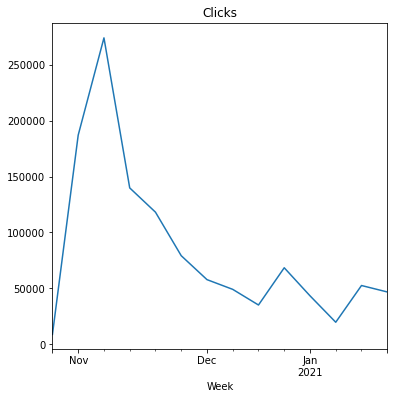

In [13]:
trend_plt_clk  = Preformance_pivot1_clk.plot(figsize = (6,6), title = 'Clicks')
fig = trend_plt_clk.get_figure()
fig.savefig("trend_plt_clk.png")

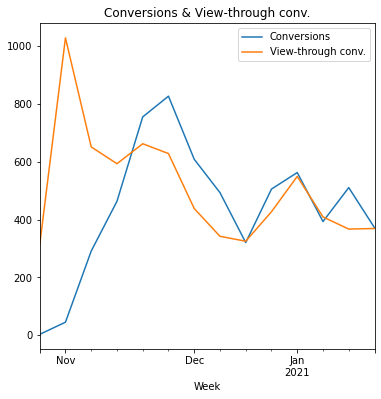

In [14]:
trend_plt_conv = Preformance_pivot1_conv.T.plot(figsize = (6,6), title = 'Conversions & View-through conv.')
fig = trend_plt_conv.get_figure()
fig.savefig("trend_plt_conv.png")

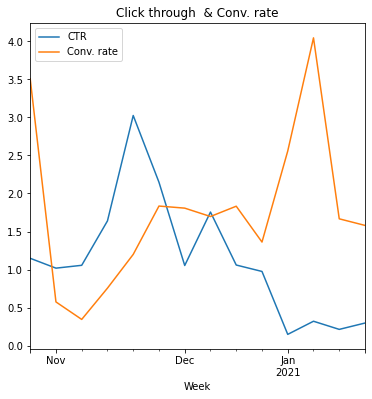

In [15]:
trend_plt_rate = Preformance_pivot1_rate.T.plot(figsize = (6,6), title = 'Click through  & Conv. rate')
fig = trend_plt_rate.get_figure()
fig.savefig("trend_plt_rate.png")

In [ ]:
# Again once Christmas and New-Years were over - the advertising and campaigns got back on and therfore we can see the 
# increase in clicks, CTR etc. 